In [1]:
import pandas as pd 
import numpy as np 


!pip install geopy
from geopy.geocoders import Nominatim 

    
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


***Searching of latitude and longitude of the appartment in Warsaw***

In [2]:
address='Długa 8/14, 00-238 Warszawa, Poland'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('Location of  the appartment in Warsaw:{},{}'.format(latitude1, longitude1))

Location of  the appartment in Warsaw:52.2502881,21.00785397884342


***Searching of latitude and longitude of the appartment in Paris***

In [3]:
address='23 Rue de Lille, 75007 Paris'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude2 = location.latitude
longitude2 = location.longitude
print('Location of the appartment in Paris:{},{}'.format(latitude2, longitude2))

Location of the appartment in Paris:48.8583409,2.3301665


***Defining Foursquare Credentials and Version
Defining limit and radius of search***

In [4]:
CLIENT_ID = '21HUMNJVSZK1PNLPQEYZ2GEWQMJXAPDJUROY5LVTVCUNEOFL' 
CLIENT_SECRET = 'DWOCCKPZM3PRBFI00XAYTKY5NWR04ATX3CSDNLBBQCJKGBXG'
ACCESS_TOKEN = 'FLN0L3HB2CWYA1CAVRSMKCCSJ0BJJBYMRIJB3QZ540AF3G0B' 
VERSION = '20180604'
LIMIT = 1000
radius = 1000

***We want to get the top 100 venues that are in Warsaw within a radius of 1000 meters from the appartment.
We create the GET request URL. URL for search in Warsaw is named as url1***

In [5]:
url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, radius, LIMIT)
url1

'https://api.foursquare.com/v2/venues/explore?client_id=21HUMNJVSZK1PNLPQEYZ2GEWQMJXAPDJUROY5LVTVCUNEOFL&client_secret=DWOCCKPZM3PRBFI00XAYTKY5NWR04ATX3CSDNLBBQCJKGBXG&ll=52.2502881,21.00785397884342&v=20180604&radius=1000&limit=1000'

In [6]:
import requests

In [7]:
results1 = requests.get(url1).json()

In [8]:
results1

{'meta': {'code': 200, 'requestId': '60c0baa41008183f464e8bf5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Nowe Miasto',
  'headerFullLocation': 'Nowe Miasto, Warsaw',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 127,
  'suggestedBounds': {'ne': {'lat': 52.25928810900001,
    'lng': 21.022527304123404},
   'sw': {'lat': 52.24128809099999, 'lng': 20.99318065356344}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ce6e025595cb1f7c6f4be14',
       'name': 'Rynek Starego Miasta',
       'location': {'address': 'Rynek Starego Miasta',
        'lat': 52.249675871507065,
        'lng': 21.012160176095257,
        'labeledLatLngs': [{'label': 'display',
        

In [9]:
items1 = results1['response']['groups'][0]['items']
items1[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4ce6e025595cb1f7c6f4be14',
  'name': 'Rynek Starego Miasta',
  'location': {'address': 'Rynek Starego Miasta',
   'lat': 52.249675871507065,
   'lng': 21.012160176095257,
   'labeledLatLngs': [{'label': 'display',
     'lat': 52.249675871507065,
     'lng': 21.012160176095257}],
   'distance': 301,
   'cc': 'PL',
   'neighborhood': 'Stare Miasto',
   'city': 'Warszawa',
   'state': 'Województwo mazowieckie',
   'country': 'Polska',
   'formattedAddress': ['Rynek Starego Miasta', 'Warszawa', 'Polska']},
  'categories': [{'id': '4bf58dd8d48988d164941735',
    'name': 'Plaza',
    'pluralName': 'Plazas',
    'shortName': 'Plaza',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4ce6e025

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

***We create DataFrame from json file. For our purpose we need just venue name, venue categories and venue id. We filter our DataFrame***

In [11]:
dataframe1 = pd.json_normalize(items1) 


filtered_columns = ['venue.name', 'venue.categories','venue.id'] 
dataframe_filtered1 = dataframe1.loc[:, filtered_columns]


dataframe_filtered1['venue.categories'] = dataframe_filtered1.apply(get_category_type, axis=1)


dataframe_filtered1.head(10)

,venue.name,venue.categories,venue.id
0,Rynek Starego Miasta,Plaza,4ce6e025595cb1f7c6f4be14
1,Same Krafty,Beer Bar,5495c749498e6cfc151ff8e2
2,Pożegnanie z Afryką,Coffee Shop,4d03df9d54d0236afdbaebd5
3,Rynek Nowego Miasta,Plaza,4c8b82cbe51e6dcb6bcb72de
4,Plac Krasińskich,Plaza,4c545beca724e21eefd044f6
5,Ogród Krasińskich,Park,4bb6da771344b713f12c9e04
6,Same Fusy,Tea Room,4b93b186f964a520484d34e3
7,Celibar,Bar,4cd57aa4122ba14354502ca1
8,Plac Zamkowy,Plaza,4bab8abaf964a520e3b13ae3
9,Bar and Books Podwale,Lounge,55c4dc56498e1fc7b08b6802


***We change the name of columns***

In [12]:
dataframe_filtered1=dataframe_filtered1.rename(columns={"venue.name": "Name", "venue.categories": "Category", "venue.id":"code"})
dataframe_filtered1.head()

,Name,Category,code
0,Rynek Starego Miasta,Plaza,4ce6e025595cb1f7c6f4be14
1,Same Krafty,Beer Bar,5495c749498e6cfc151ff8e2
2,Pożegnanie z Afryką,Coffee Shop,4d03df9d54d0236afdbaebd5
3,Rynek Nowego Miasta,Plaza,4c8b82cbe51e6dcb6bcb72de
4,Plac Krasińskich,Plaza,4c545beca724e21eefd044f6


***Let's check the number of venues in our DataFrame***

In [13]:
dataframe_filtered1.shape

(100, 3)

***In this analysis we are interested just in restaurants. Let's filter our DataFrame again***

In [14]:
dataframe_filtered1=dataframe_filtered1[dataframe_filtered1['Category'].str.contains('Restaurant')]
dataframe_filtered1.head(10)

,Name,Category,code
16,Vegan na Moliera,Falafel Restaurant,57b84af9498e86a9b3b73112
17,Senses,Molecular Gastronomy Restaurant,53374ff5498e2c42491f679d
18,Restauracja Freta 33,Eastern European Restaurant,4c2f50a2213c2d7fac96305d
19,Vege Miasto,Vegetarian / Vegan Restaurant,53497b22498e3623c9df22e2
20,Portretowa,Polish Restaurant,4cab5c35a6e08cfa2309a594
21,Trattoria Rucola,Italian Restaurant,4e6380331838ad3d0f401570
24,Gospoda Pod Kogutem,Polish Restaurant,4db5a617f7b121c29f62df57
25,Sakana Sushi,Sushi Restaurant,4b95481df964a520eb9934e3
26,Nonna Rita,Italian Restaurant,514e0a63e4b0f713aef15494
27,Casa Italia,Italian Restaurant,4ebacc0129c29ddd427d78f1


***Let's check the number of venues in our new DataFrame which contains just restaurants***

In [15]:
dataframe_filtered1.shape

(31, 3)

***We want to check which kind of restaurants occurs in our DataFrame. Let's use groupby function***

In [16]:
dataframe_filtered1.groupby('Category').count()

,Name,code
Category,,
Chinese Restaurant,1,1
Dumpling Restaurant,3,3
Eastern European Restaurant,3,3
Falafel Restaurant,1,1
Italian Restaurant,5,5
Modern European Restaurant,1,1
Molecular Gastronomy Restaurant,1,1
Polish Restaurant,7,7
Restaurant,4,4


***In this analysis we want to search for nearby restaurants which offers food typical for countries. Therefore, we should get rid of venues like Restaurant, Sushi Restaurant, Falafel Restaurant, etc...***

In [17]:
dataframe_filtered1=dataframe_filtered1[dataframe_filtered1['Category']!=('Vegetarian / Vegan Restaurant')]

In [18]:
dataframe_filtered1=dataframe_filtered1[dataframe_filtered1['Category']!=('Sushi Restaurant')]

In [19]:
dataframe_filtered1=dataframe_filtered1[dataframe_filtered1['Category']!=('Restaurant')]

In [20]:
dataframe_filtered1=dataframe_filtered1[dataframe_filtered1['Category']!=('Molecular Gastronomy Restaurant')]

In [21]:
dataframe_filtered1=dataframe_filtered1[dataframe_filtered1['Category']!=('Falafel Restaurant')]

In [22]:
dataframe_filtered1=dataframe_filtered1[dataframe_filtered1['Category']!=('Dumpling Restaurant')]

***Let's see how it looks like now***

In [23]:
dataframe_filtered1.groupby('Category').count()

,Name,code
Category,,
Chinese Restaurant,1,1
Eastern European Restaurant,3,3
Italian Restaurant,5,5
Modern European Restaurant,1,1
Polish Restaurant,7,7
Thai Restaurant,2,2


***We can see in our DataFrame 2 kinds of european restaurants: Eastern European Restaurant and Modern European Restaurant. Let's connect it and name as European Restaurant***

In [24]:
dataframe_filtered1.loc[dataframe_filtered1.Category.str.contains('European'), 'Category'] = 'European Restaurant'

In [25]:
dataframe_filtered1

,Name,Category,code
18,Restauracja Freta 33,European Restaurant,4c2f50a2213c2d7fac96305d
20,Portretowa,Polish Restaurant,4cab5c35a6e08cfa2309a594
21,Trattoria Rucola,Italian Restaurant,4e6380331838ad3d0f401570
24,Gospoda Pod Kogutem,Polish Restaurant,4db5a617f7b121c29f62df57
26,Nonna Rita,Italian Restaurant,514e0a63e4b0f713aef15494
27,Casa Italia,Italian Restaurant,4ebacc0129c29ddd427d78f1
30,Restauracja Stolica,Polish Restaurant,58e7c981b210146380e8a818
33,Dom Wódki,Polish Restaurant,5600453a498e89e613f84074
42,Pierrogeria,European Restaurant,4b93989bf964a520a04934e3
44,Przy Zamku,European Restaurant,4bfd67e1e529c928fae0ba8c


In [26]:
dataframe_filtered1.groupby('Category').count()

,Name,code
Category,,
Chinese Restaurant,1,1
European Restaurant,4,4
Italian Restaurant,5,5
Polish Restaurant,7,7
Thai Restaurant,2,2


***Now we would like to add to our DataFrame location of each of selected venues.***

In [27]:
dataframe_filtered1

,Name,Category,code
18,Restauracja Freta 33,European Restaurant,4c2f50a2213c2d7fac96305d
20,Portretowa,Polish Restaurant,4cab5c35a6e08cfa2309a594
21,Trattoria Rucola,Italian Restaurant,4e6380331838ad3d0f401570
24,Gospoda Pod Kogutem,Polish Restaurant,4db5a617f7b121c29f62df57
26,Nonna Rita,Italian Restaurant,514e0a63e4b0f713aef15494
27,Casa Italia,Italian Restaurant,4ebacc0129c29ddd427d78f1
30,Restauracja Stolica,Polish Restaurant,58e7c981b210146380e8a818
33,Dom Wódki,Polish Restaurant,5600453a498e89e613f84074
42,Pierrogeria,European Restaurant,4b93989bf964a520a04934e3
44,Przy Zamku,European Restaurant,4bfd67e1e529c928fae0ba8c


***Let's create now DataFrame which contains locations of selected venues***

In [28]:
dataframe_location1 = dataframe1.loc[:, ['venue.id','venue.location.lat','venue.location.lng']]
dataframe_location1=dataframe_location1.rename(columns={"venue.location.lat": "Latitude", "venue.location.lng": "Longitude", "venue.id":"code"})

In [29]:
dataframe_location1 

,code,Latitude,Longitude
0,4ce6e025595cb1f7c6f4be14,52.249676,21.012160
1,5495c749498e6cfc151ff8e2,52.250237,21.010961
2,4d03df9d54d0236afdbaebd5,52.251014,21.009210
3,4c8b82cbe51e6dcb6bcb72de,52.252648,21.007831
4,4c545beca724e21eefd044f6,52.248839,21.005918
...,...,...,...
95,4c1ca0aee9c4ef3b1ad845aa,52.248103,21.016583
96,4e52930162e1f6d84aaa296a,52.244744,21.001932
97,4c93a735f7cfa1cdf96eac15,52.248571,21.013230
98,5676c93d498e9399a7b64d9b,52.251109,20.993711


In [30]:
final_dataframe1 = pd.merge(dataframe_filtered1,dataframe_location1, on='code')

In [31]:
final_dataframe1

,Name,Category,code,Latitude,Longitude
0,Restauracja Freta 33,European Restaurant,4c2f50a2213c2d7fac96305d,52.252622,21.007844
1,Portretowa,Polish Restaurant,4cab5c35a6e08cfa2309a594,52.248344,21.010974
2,Trattoria Rucola,Italian Restaurant,4e6380331838ad3d0f401570,52.246185,21.012976
3,Gospoda Pod Kogutem,Polish Restaurant,4db5a617f7b121c29f62df57,52.253226,21.007185
4,Nonna Rita,Italian Restaurant,514e0a63e4b0f713aef15494,52.252898,21.007421
5,Casa Italia,Italian Restaurant,4ebacc0129c29ddd427d78f1,52.251165,21.007104
6,Restauracja Stolica,Polish Restaurant,58e7c981b210146380e8a818,52.249564,21.010515
7,Dom Wódki,Polish Restaurant,5600453a498e89e613f84074,52.243792,21.008755
8,Pierrogeria,European Restaurant,4b93989bf964a520a04934e3,52.250440,21.010349
9,Przy Zamku,European Restaurant,4bfd67e1e529c928fae0ba8c,52.247857,21.013688


***We create 5 DataFrames, each one corresponding to one type of restaurant***

In [32]:
final_dataframe1_European=final_dataframe1[final_dataframe1['Category'].str.contains('European')]
final_dataframe1_Chinese=final_dataframe1[final_dataframe1['Category'].str.contains('Chinese')]
final_dataframe1_Italian=final_dataframe1[final_dataframe1['Category'].str.contains('Italian')]
final_dataframe1_Polish=final_dataframe1[final_dataframe1['Category'].str.contains('Polish')]
final_dataframe1_Thai=final_dataframe1[final_dataframe1['Category'].str.contains('Thai')]

***We create map giving as location the appartment in Warsaw***

In [33]:
map_clusters1 = folium.Map(location=[latitude1, longitude1], zoom_start=10)

### Now we want to indicate each kind of restaurant by different color ###
   **<br> <font color='blue'>European Restaurant - BLUE </font>
    <br><font color='green'>Chinese Restaurant - GREEN </font>
    <br><font color='red'>Italian Restaurant - RED </font>
    <br><font color='yellow'>Polish Restaurant - YELLOW </font>
    <br><font color='violet'>Thai Restaurant - VIOLET </font>**

In [34]:
for lat, lng, name in zip(final_dataframe1_European['Latitude'], final_dataframe1_European['Longitude'], final_dataframe1_European['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.7).add_to(map_clusters1)
for lat, lng, name in zip(final_dataframe1_Chinese['Latitude'], final_dataframe1_Chinese['Longitude'], final_dataframe1_Chinese['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="green",
        fill=True,
        fill_color="green",
        fill_opacity=0.7).add_to(map_clusters1)
for lat, lng, name in zip(final_dataframe1_Italian['Latitude'], final_dataframe1_Italian['Longitude'], final_dataframe1_Italian['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7).add_to(map_clusters1)
for lat, lng, name in zip(final_dataframe1_Polish['Latitude'], final_dataframe1_Polish['Longitude'], final_dataframe1_Polish['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="yellow",
        fill=True,
        fill_color="yellow",
        fill_opacity=0.7).add_to(map_clusters1)
for lat, lng, name in zip(final_dataframe1_Thai['Latitude'], final_dataframe1_Thai['Longitude'], final_dataframe1_Thai['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="violet",
        fill=True,
        fill_color="violet",
        fill_opacity=0.7).add_to(map_clusters1)

In [35]:
map_clusters1

### Now, let's pass the same steps for the appartment in Paris ###

In [36]:
url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, radius, LIMIT)
url2

'https://api.foursquare.com/v2/venues/explore?client_id=21HUMNJVSZK1PNLPQEYZ2GEWQMJXAPDJUROY5LVTVCUNEOFL&client_secret=DWOCCKPZM3PRBFI00XAYTKY5NWR04ATX3CSDNLBBQCJKGBXG&ll=48.8583409,2.3301665&v=20180604&radius=1000&limit=1000'

In [37]:
results2 = requests.get(url2).json()

In [38]:
results2

{'meta': {'code': 200, 'requestId': '60c0baa5fdfccd30fbceb580'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': "Saint Thomas d'Aquin",
  'headerFullLocation': "Saint Thomas d'Aquin, Paris",
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 202,
  'suggestedBounds': {'ne': {'lat': 48.86734090900001,
    'lng': 2.3438203853893076},
   'sw': {'lat': 48.84934089099999, 'lng': 2.316512614610692}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cab440436fa6dcb2f6cd778',
       'name': "Galerie d'Art Primitif Africain        Art Gallery l'Oeil et la Main     Expert",
       'location': {'address': '41 rue de Verneuil',
        'lat': 48.857997,
        'lng': 2.328082,
 

In [39]:
items2 = results2['response']['groups'][0]['items']
items2[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4cab440436fa6dcb2f6cd778',
  'name': "Galerie d'Art Primitif Africain        Art Gallery l'Oeil et la Main     Expert",
  'location': {'address': '41 rue de Verneuil',
   'lat': 48.857997,
   'lng': 2.328082,
   'labeledLatLngs': [{'label': 'display', 'lat': 48.857997, 'lng': 2.328082}],
   'distance': 157,
   'postalCode': '75007',
   'cc': 'FR',
   'city': 'Paris',
   'state': 'Île-de-France',
   'country': 'France',
   'formattedAddress': ['41 rue de Verneuil', '75007 Paris', 'France']},
  'categories': [{'id': '4bf58dd8d48988d1e2931735',
    'name': 'Art Gallery',
    'pluralName': 'Art Galleries',
    'shortName': 'Art Gallery',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []},
  'venuePage'

In [40]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
dataframe2 = pd.json_normalize(items2) 


filtered_columns = ['venue.name', 'venue.categories','venue.id'] 
dataframe_filtered2 = dataframe2.loc[:, filtered_columns]


dataframe_filtered2['venue.categories'] = dataframe_filtered2.apply(get_category_type, axis=1)


dataframe_filtered2.head(10)

,venue.name,venue.categories,venue.id
0,Galerie d'Art Primitif Africain Art Gal...,Art Gallery,4cab440436fa6dcb2f6cd778
1,Androuët,Cheese Shop,4b9f82c2f964a520ab2737e3
2,Musée d'Orsay,Art Museum,4adcda10f964a5208b3521e3
3,Cinq Mars,French Restaurant,4b4fa981f964a520b30f27e3
4,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",Art Museum,588ba9a9fc5a5f18a36a2a05
5,Hôtel Verneuil,Hotel,4adcda03f964a520f13121e3
6,L'Atelier de Joël Robuchon,French Restaurant,4adcda12f964a5209d3621e3
7,Librairie du Musée d'Orsay,Bookstore,4eee19d802d514a36abd0d87
8,Buly 1803,Cosmetics Shop,533ffd0611d24e92867c9a17
9,Galerie des Impressionistes,Exhibit,5888b2a89f2583522bf3fc5e


In [42]:
dataframe_filtered2=dataframe_filtered2.rename(columns={"venue.name": "Name", "venue.categories": "Category", "venue.id":"code"})
dataframe_filtered2.head()

,Name,Category,code
0,Galerie d'Art Primitif Africain Art Gal...,Art Gallery,4cab440436fa6dcb2f6cd778
1,Androuët,Cheese Shop,4b9f82c2f964a520ab2737e3
2,Musée d'Orsay,Art Museum,4adcda10f964a5208b3521e3
3,Cinq Mars,French Restaurant,4b4fa981f964a520b30f27e3
4,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",Art Museum,588ba9a9fc5a5f18a36a2a05


In [43]:
dataframe_filtered2.shape

(100, 3)

In [44]:
dataframe_filtered2=dataframe_filtered2[dataframe_filtered2['Category'].str.contains('Restaurant')]
dataframe_filtered2.head(10)

,Name,Category,code
3,Cinq Mars,French Restaurant,4b4fa981f964a520b30f27e3
6,L'Atelier de Joël Robuchon,French Restaurant,4adcda12f964a5209d3621e3
10,Galette Café,French Restaurant,50741509e4b035a218860e59
14,Au Clover,Restaurant,54878904498e9d3050f1f4ae
21,La Divina Commedia,Italian Restaurant,4e94d11f61afef051b777ad5
27,Coya,Peruvian Restaurant,5d6ae3b0ca1763000823441b
30,Cook'n Saj,Lebanese Restaurant,58553800fad9dc06353fb898
33,L'Affable,Restaurant,4ebbcecaf7903b1faea7578d
39,LouLou,Italian Restaurant,57421b43498eb3b82c128e67
40,Aux Prés,French Restaurant,4df27ab522718759f81c4fc7


In [45]:
dataframe_filtered2.shape

(32, 3)

In [46]:
dataframe_filtered2.groupby('Category').count()

,Name,code
Category,,
American Restaurant,1,1
Breton Restaurant,1,1
French Restaurant,12,12
Greek Restaurant,1,1
Italian Restaurant,6,6
Japanese Restaurant,3,3
Korean Restaurant,1,1
Lebanese Restaurant,1,1
Mexican Restaurant,1,1


In [47]:
dataframe_filtered2=dataframe_filtered2[dataframe_filtered2['Category']!=('Restaurant')]
dataframe_filtered2=dataframe_filtered2[dataframe_filtered2['Category']!=('Seafood Restaurant')]
dataframe_filtered2=dataframe_filtered2[dataframe_filtered2['Category']!=('Udon Restaurant')]

In [48]:
dataframe_filtered2.groupby('Category').count()

,Name,code
Category,,
American Restaurant,1,1
Breton Restaurant,1,1
French Restaurant,12,12
Greek Restaurant,1,1
Italian Restaurant,6,6
Japanese Restaurant,3,3
Korean Restaurant,1,1
Lebanese Restaurant,1,1
Mexican Restaurant,1,1


In [49]:
dataframe_location2 = dataframe2.loc[:, ['venue.id','venue.location.lat','venue.location.lng']]
dataframe_location2=dataframe_location2.rename(columns={"venue.location.lat": "Latitude", "venue.location.lng": "Longitude", "venue.id":"code"})
dataframe_location2

,code,Latitude,Longitude
0,4cab440436fa6dcb2f6cd778,48.857997,2.328082
1,4b9f82c2f964a520ab2737e3,48.858279,2.328202
2,4adcda10f964a5208b3521e3,48.859993,2.326387
3,4b4fa981f964a520b30f27e3,48.858653,2.326972
4,588ba9a9fc5a5f18a36a2a05,48.860724,2.332121
...,...,...,...
95,4f58dfcfe4b0c3218c855f34,48.865927,2.330284
96,4bb76fbaef159c74dd2d77f7,48.851883,2.328321
97,5953f0feeacf45405b8137bf,48.864583,2.332702
98,4cf173c9899c6ea8b5b1f0c1,48.864757,2.335377


In [50]:
final_dataframe2 = pd.merge(dataframe_filtered2,dataframe_location2, on='code')
final_dataframe2

,Name,Category,code,Latitude,Longitude
0,Cinq Mars,French Restaurant,4b4fa981f964a520b30f27e3,48.858653,2.326972
1,L'Atelier de Joël Robuchon,French Restaurant,4adcda12f964a5209d3621e3,48.856691,2.327597
2,Galette Café,French Restaurant,50741509e4b035a218860e59,48.856349,2.331663
3,La Divina Commedia,Italian Restaurant,4e94d11f61afef051b777ad5,48.853696,2.331228
4,Coya,Peruvian Restaurant,5d6ae3b0ca1763000823441b,48.854232,2.324613
5,Cook'n Saj,Lebanese Restaurant,58553800fad9dc06353fb898,48.853142,2.331967
6,LouLou,Italian Restaurant,57421b43498eb3b82c128e67,48.862804,2.333500
7,Aux Prés,French Restaurant,4df27ab522718759f81c4fc7,48.852685,2.330482
8,kbg,Korean Restaurant,560e7085498e72653d8050e6,48.853690,2.331231
9,À La Petite Chaise,French Restaurant,4b1d5c8af964a520600f24e3,48.853720,2.327339


In [51]:
final_dataframe2_American=final_dataframe2[final_dataframe2['Category'].str.contains('American')]
final_dataframe2_Breton=final_dataframe2[final_dataframe2['Category'].str.contains('Breton')]
final_dataframe2_French=final_dataframe2[final_dataframe2['Category'].str.contains('French')]
final_dataframe2_Greek=final_dataframe2[final_dataframe2['Category'].str.contains('Greek')]
final_dataframe2_Italian=final_dataframe2[final_dataframe2['Category'].str.contains('Italian')]
final_dataframe2_Japanese=final_dataframe2[final_dataframe2['Category'].str.contains('Japanese')]
final_dataframe2_Korean=final_dataframe2[final_dataframe2['Category'].str.contains('Korean')]
final_dataframe2_Lebanese=final_dataframe2[final_dataframe2['Category'].str.contains('Lebanese')]
final_dataframe2_Mexican=final_dataframe2[final_dataframe2['Category'].str.contains('Mexican')]
final_dataframe2_Peruvian=final_dataframe2[final_dataframe2['Category'].str.contains('Peruvian')]

In [52]:
map_clusters2 = folium.Map(location=[latitude2, longitude2], zoom_start=10)

### Now we want to indicate each kind of restaurant by different color ###
  **<br> <font color='blue'>American Restaurant - BLUE </font>
    <br><font color='green'>Breton Restaurant - GREEN </font>
    <br><font color='red'>French Restaurant - RED </font>
    <br><font color='yellow'>Greek Restaurant - YELLOW </font>
    <br><font color='violet'>Italian Restaurant - VIOLET </font>
    <br><font color='olive'>Japanese Restaurant - OLIVE </font>
    <br><font color='orange'>Korean Restaurant - ORANGE </font>
    <br><font color='beige'>Lebanese Restaurant - BEIGE </font>
    <br><font color='gray'>Mexican Restaurant - GRAY </font>
    <br><font color='turquoise'>Peruvian Restaurant - TURQUOISE </font>**

In [53]:
for lat, lng, name in zip(final_dataframe2_American['Latitude'], final_dataframe2_American['Longitude'], final_dataframe2_American['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.7).add_to(map_clusters2)
for lat, lng, name in zip(final_dataframe2_Breton['Latitude'], final_dataframe2_Breton['Longitude'], final_dataframe2_Breton['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="green",
        fill=True,
        fill_color="green",
        fill_opacity=0.7).add_to(map_clusters2)
for lat, lng, name in zip(final_dataframe2_French['Latitude'], final_dataframe2_French['Longitude'], final_dataframe2_French['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7).add_to(map_clusters2)
for lat, lng, name in zip(final_dataframe2_Greek['Latitude'], final_dataframe2_Greek['Longitude'], final_dataframe2_Greek['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="yellow",
        fill=True,
        fill_color="yellow",
        fill_opacity=0.7).add_to(map_clusters2)
for lat, lng, name in zip(final_dataframe2_Italian['Latitude'], final_dataframe2_Italian['Longitude'], final_dataframe2_Italian['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="violet",
        fill=True,
        fill_color="violet",
        fill_opacity=0.7).add_to(map_clusters2)
for lat, lng, name in zip(final_dataframe2_Japanese['Latitude'], final_dataframe2_Japanese['Longitude'], final_dataframe2_Japanese['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="olive",
        fill=True,
        fill_color="olive",
        fill_opacity=0.7).add_to(map_clusters2)
for lat, lng, name in zip(final_dataframe2_Korean['Latitude'], final_dataframe2_Korean['Longitude'], final_dataframe2_Korean['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="orange",
        fill=True,
        fill_color="orange",
        fill_opacity=0.7).add_to(map_clusters2)
for lat, lng, name in zip(final_dataframe2_Lebanese['Latitude'], final_dataframe2_Lebanese['Longitude'], final_dataframe2_Lebanese['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="beige",
        fill=True,
        fill_color="beige",
        fill_opacity=0.7).add_to(map_clusters2)
for lat, lng, name in zip(final_dataframe2_Mexican['Latitude'], final_dataframe2_Mexican['Longitude'], final_dataframe2_Mexican['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="grey",
        fill=True,
        fill_color="grey",
        fill_opacity=0.7).add_to(map_clusters2)
for lat, lng, name in zip(final_dataframe2_Peruvian['Latitude'], final_dataframe2_Peruvian['Longitude'], final_dataframe2_Peruvian['Name']):
    label=name
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="turquoise",
        fill=True,
        fill_color="turquoise",
        fill_opacity=0.7).add_to(map_clusters2)

In [54]:
map_clusters2

***Let's viualize the results. We can see better what is around these 2 appartments***

In [55]:
import matplotlib.pyplot as plt


In [56]:
restaurants1=dataframe_filtered1.groupby('Category').count()['Name']

In [57]:
restaurants1

Category
Chinese Restaurant     1
European Restaurant    4
Italian Restaurant     5
Polish Restaurant      7
Thai Restaurant        2
Name: Name, dtype: int64

In [71]:
labels1=restaurants1.reset_index()['Category'].tolist()
explode1 = (0,0,0, 0.1, 0)

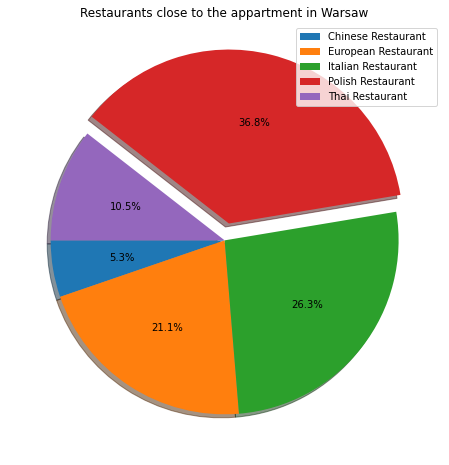

In [72]:
plt1=restaurants1.plot(kind='pie',figsize=(8,8), explode=explode1,autopct='%1.1f%%',shadow=True,labels=None,startangle=180,title='Restaurants close to the appartment in Warsaw',label='')
plt1.legend(labels=labels1)

In [73]:
restaurants2=dataframe_filtered2.groupby('Category').count()['Name']

In [74]:
labels2=restaurants2.reset_index()['Category'].tolist()

In [75]:
explode2 = (0,0,0.1,0,0,0,0,0,0, 0)

In [76]:
labels2

['American Restaurant',
 'Breton Restaurant',
 'French Restaurant',
 'Greek Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Lebanese Restaurant',
 'Mexican Restaurant',
 'Peruvian Restaurant']

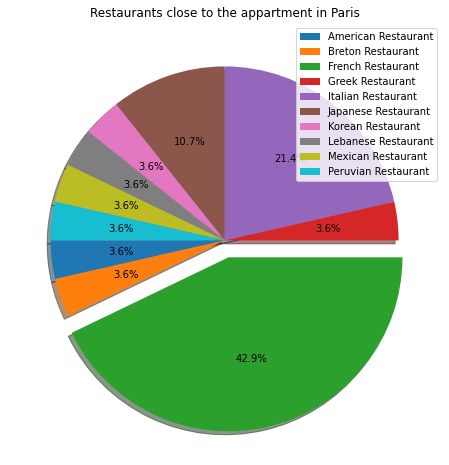

In [77]:
plt2=restaurants2.plot(kind='pie',figsize=(8,8), explode=explode2,autopct='%1.1f%%',shadow=True,labels=None,startangle=180,title='Restaurants close to the appartment in Paris',label='')
plt2.legend(labels=labels2)

***Let's create Bar plot in order to compare the restaurants in Paris and in Warsaw***

In [78]:
all = pd.merge(restaurants1,restaurants2, how='outer', on='Category')

In [79]:
all=all.rename(columns={"Name_x": "Warsaw", "Name_y": "Paris"})

In [80]:
all=all.fillna(0)

In [81]:
all.reset_index(inplace=True)

In [82]:
all

,Category,Warsaw,Paris
0,Chinese Restaurant,1.0,0.0
1,European Restaurant,4.0,0.0
2,Italian Restaurant,5.0,6.0
3,Polish Restaurant,7.0,0.0
4,Thai Restaurant,2.0,0.0
5,American Restaurant,0.0,1.0
6,Breton Restaurant,0.0,1.0
7,French Restaurant,0.0,12.0
8,Greek Restaurant,0.0,1.0
9,Japanese Restaurant,0.0,3.0


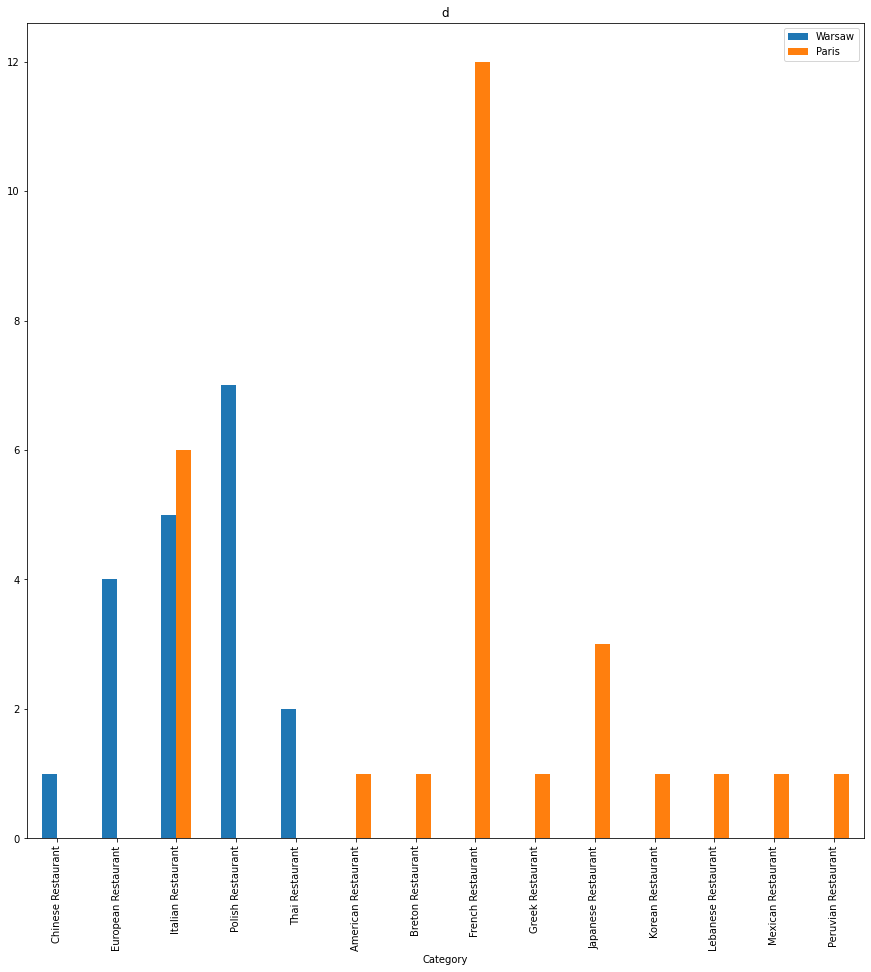

In [85]:
all.plot(x='Category', y=["Warsaw", "Paris"], kind="bar",figsize=(15,15),title='d')

***As we can see we have much greater choice in Paris. We can find there diverse restaurants. Hovewer, in Paris, nearby the appartment we cannot find a chinese or polish restaurant.***

***It is not surprising that in Warsaw, the majority of restaurant are polish restaurants ans in Paris - french.***

***As in Paris we can find more italian restaurant - this is better choice.***